# World happiness report


The World Happiness Report ranks 156 countries by their happiness levels (`Happiness.Score`). The rankings come from the Gallup World Poll and are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2013-2015. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The other variables in the dataset show the estimated extent to which each of the factors contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the factors (for more information about the data, visit this [FAQ-site](https://s3.amazonaws.com/happiness-report/2016/FAQ_2016.pdf) or the [World Happiness Report-site](http://worldhappiness.report/ed/2016/)).

Data Source: 

*Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I).
New York: Sustainable Development Solutions Network.*


## Task Description

In this assignment, we analyse the relationship between the country specific happiness and some predictor variables. In particular, we want to classify which countries are likely to be "happy". 


Data preparation:

- 1.0 Import the data and perform a quick data inspection.  

- 1.1 Drop the variable 'Unnamed: 0' and rename the variables in the DataFrame to 'Country', 'Happiness_Score', 'Economy', 'Family', 'Health' and 'Trust'. 

- 1.2 Create a new categorical variable called `Happy`, where all countries with a Happiness_Score > 5.5 are labeled with 1, otherwise 0.  
    
- 1.3 Delete the variable `Happiness_Score` 
  
- 1.4 Use scikit-learn to make the train test split (`X_train`, `X_test`, `y_train`, `y_test`) and create a pandas data exploration set from your training data (`df_train`). 
  
- 1.5 Perform exploratory data analysis to find differences in the distributions of the two groups (Happy: `1` and `0`).  

- 1.6. Check for relationships with correlations (use pairwise correlations and variance inflation factor).

Logistic regression model:

- 2.0 Fit a logistic regression model with the following predictor variables (response: `Happy`; predictors: `Family`, `Health` and `Trust`) on the pandas training data (df_train).

- 2.1 Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.

- 2.2 Use your updated model and predict the probability that a country has "happy" inhabitants (use df_train) based on 3 different thresholds. In particular, classify countries with label `1` if the predicted probability exceeds the thresholds stated below (otherwise classify the country as happy (with `0`)) :

  - 0.4 (i.e. threshold = 0.4) 
  - 0.5 (i.e. threshold = 0.5)
  - 0.7 (i.e. threshold = 0.7)

- 2.3 Compute the classification report (`from sklearn.metrics import classification_report`) in order to determine how many observations were correctly or incorrectly classified. Which threshold would you recommend? 

- 2.4 Use the test data to evaluate your model with a threshold of 0.5.

## 1.0 Import data

In [281]:
import pandas as pd

# Load the csv data files into pandas dataframes
PATH = 'https://raw.githubusercontent.com/kirenz/datasets/master/happy.csv' 
df = pd.read_csv(PATH)

First of all, let's take a look at the data set.

In [282]:
# show data set
df

,Unnamed: 0,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.41004
...,...,...,...,...,...,...,...
152,153,Benin,3.484,0.39499,0.10419,0.21028,0.06681
153,154,Afghanistan,3.360,0.38227,0.11037,0.17344,0.07112
154,155,Togo,3.303,0.28123,0.00000,0.24811,0.11587
155,156,Syria,3.069,0.74719,0.14866,0.62994,0.17233


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     157 non-null    int64  
 1   Country                        157 non-null    object 
 2   Happiness.Score                157 non-null    float64
 3   Economy..GDP.per.Capita.       157 non-null    float64
 4   Family                         157 non-null    float64
 5   Health..Life.Expectancy.       157 non-null    float64
 6   Trust..Government.Corruption.  157 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.7+ KB


## 1.1 Drop and rename

In [284]:
# Drop variables we don't need
df = df.drop('Unnamed: 0', axis=1)

In [285]:
df.columns = ['Country', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Trust']
df.head()

,Country,Happiness_Score,Economy,Family,Health,Trust
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004


## 1.2 Create flag

In [286]:
import numpy as np

df['Happy'] = np.where(df['Happiness_Score']>5.5, 1, 0)

In [287]:
df

,Country,Happiness_Score,Economy,Family,Health,Trust,Happy
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453,1
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203,1
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975,1
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776,1
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004,1
...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.06681,0
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.07112,0
154,Togo,3.303,0.28123,0.00000,0.24811,0.11587,0
155,Syria,3.069,0.74719,0.14866,0.62994,0.17233,0


In [288]:
df.Happy.value_counts()

0    84
1    73
Name: Happy, dtype: int64

## 1.3 Drop feature

In [289]:
df = df.drop('Happiness_Score', axis=1)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  157 non-null    object 
 1   Economy  157 non-null    float64
 2   Family   157 non-null    float64
 3   Health   157 non-null    float64
 4   Trust    157 non-null    float64
 5   Happy    157 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.5+ KB


## 1.4 Data splitting

In [291]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Country', 'Happy'])
y = df['Happy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [292]:
# Make data exploration set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

df_train

,Economy,Family,Health,Trust,Happy
8,1.44443,1.10476,0.85120,0.32331,1
19,1.69752,1.03999,0.84542,0.35329,1
12,1.50796,1.04782,0.77900,0.14868,1
10,1.33766,0.99537,0.84917,0.08728,1
46,1.25142,0.88025,0.62366,0.09081,1
...,...,...,...,...,...
3,1.57744,1.12690,0.79579,0.35776,1
130,0.35041,0.71478,0.15950,0.08582,0
134,0.31292,0.86333,0.16347,0.13647,0
155,0.74719,0.14866,0.62994,0.17233,0


## 1.5 EDA 

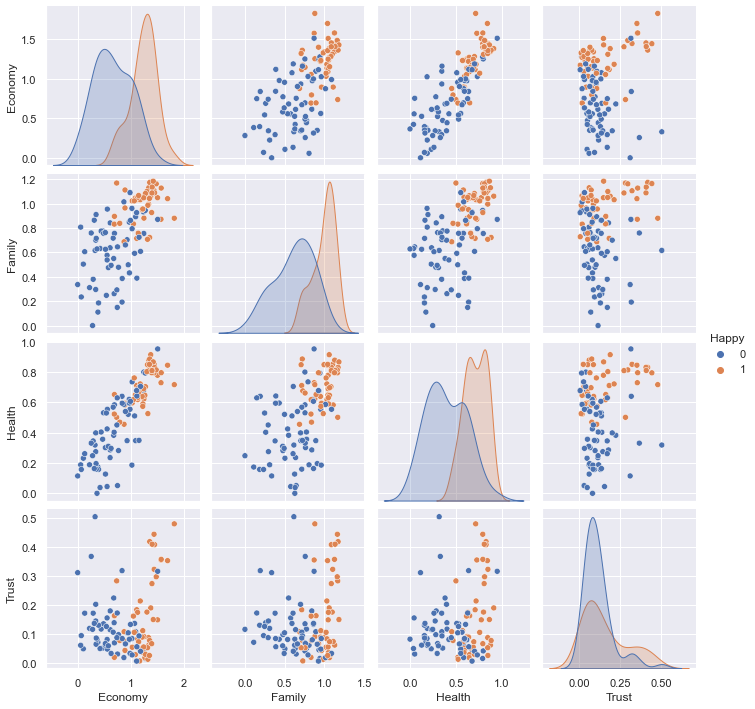

In [293]:
%matplotlib inline
import seaborn as sns

sns.pairplot(hue="Happy", data=df_train);

## 1.6 Correlation

Inspect pairwise relationship between variables (correlation):

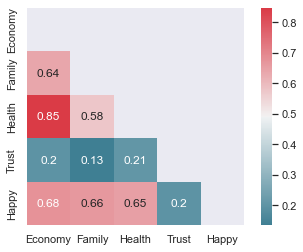

In [294]:
# Calculate correlation using the default method ( "pearson")
corr = df_train.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

We see that some of the features are correlated. In particular, Economy and Health are highly correlated. This means we should not include both Economy and Health as predictors in our model. 

Let`s also check the variance inflation factor for multicollinearity (which should not exceed 5):  

In [295]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# choose features and add constant
features = add_constant(df_train)
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,13.27,const
1,4.16,Economy
2,2.03,Family
3,3.70,Health
4,1.05,Trust
5,2.31,Happy


We observe that Economy has a fairly high VIF of almost 5. Note that since we check for multicollinearity, we don't catch the high pairwise correlation between Economy and Health. As a matter of fact, depending on your data, you could also have low pairwise correlations, but have high VIF's.

Based on the findings of our correlation analysis, we will drop the feature Economy from our model.

## 2.0 First model 

In this example, we use the statsmodel's formula api to train our model. Therefore, we use our pandas `df_train` data. 

In [296]:
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Happy ~ Health + Family + Trust' , data=df_train, family=sm.families.Binomial()).fit()

In [297]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                  109
Model:                            GLM   Df Residuals:                      105
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.153
Date:                Mon, 17 Jan 2022   Deviance:                       64.306
Time:                        12:44:04   Pearson chi2:                     77.1
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5404
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0675      2.220     -4.986      0.0

In this case, the model will predict the label "1".

## 2.1 Update Model

In [298]:
# Define and fit logistic regression model
model_2 = smf.glm(formula = 'Happy ~ Health + Family' , data=df_train, family=sm.families.Binomial()).fit()

In [299]:
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                  109
Model:                            GLM   Df Residuals:                      106
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.599
Date:                Mon, 17 Jan 2022   Deviance:                       65.198
Time:                        12:44:04   Pearson chi2:                     70.4
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5366
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7239      2.134     -5.024      0.0

## 2.2 Thresholds 

In [300]:
# Predict and join probabilty to original dataframe
df_train['y_score'] = model_2.predict()

In [301]:
df_train

,Economy,Family,Health,Trust,Happy,y_score
8,1.44443,1.10476,0.85120,0.32331,1,0.973777
19,1.69752,1.03999,0.84542,0.35329,1,0.955454
12,1.50796,1.04782,0.77900,0.14868,1,0.936326
10,1.33766,0.99537,0.84917,0.08728,1,0.939271
46,1.25142,0.88025,0.62366,0.09081,1,0.584162
...,...,...,...,...,...,...
3,1.57744,1.12690,0.79579,0.35776,1,0.968406
130,0.35041,0.71478,0.15950,0.08582,0,0.017396
134,0.31292,0.86333,0.16347,0.13647,0,0.055379
155,0.74719,0.14866,0.62994,0.17233,0,0.004558


In [302]:
# Use thresholds to discretize Probability
df_train['thresh_04'] = np.where(df_train['y_score'] > 0.4, 1, 0)
df_train['thresh_05'] = np.where(df_train['y_score'] > 0.5, 1, 0)
df_train['thresh_07'] = np.where(df_train['y_score'] > 0.7, 1, 0)

df_train

,Economy,Family,Health,Trust,Happy,y_score,thresh_04,thresh_05,thresh_07
8,1.44443,1.10476,0.85120,0.32331,1,0.973777,1,1,1
19,1.69752,1.03999,0.84542,0.35329,1,0.955454,1,1,1
12,1.50796,1.04782,0.77900,0.14868,1,0.936326,1,1,1
10,1.33766,0.99537,0.84917,0.08728,1,0.939271,1,1,1
46,1.25142,0.88025,0.62366,0.09081,1,0.584162,1,1,0
...,...,...,...,...,...,...,...,...,...
3,1.57744,1.12690,0.79579,0.35776,1,0.968406,1,1,1
130,0.35041,0.71478,0.15950,0.08582,0,0.017396,0,0,0
134,0.31292,0.86333,0.16347,0.13647,0,0.055379,0,0,0
155,0.74719,0.14866,0.62994,0.17233,0,0.004558,0,0,0


## 2.3 Classification report

Example of confusion matrix (not necessary)

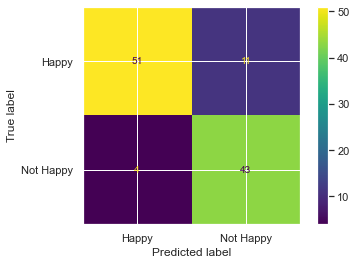

In [303]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_train['Happy'], df_train['thresh_04'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Happy', 'Not Happy'])

disp.plot();

Now we use scikit learn`s classification report:

In [304]:
from sklearn.metrics import classification_report

target_names = ['Happy', 'Not Happy']
print(classification_report(df_train['Happy'], df_train['thresh_04'], target_names=target_names))

              precision    recall  f1-score   support

       Happy       0.93      0.82      0.87        62
   Not Happy       0.80      0.91      0.85        47

    accuracy                           0.86       109
   macro avg       0.86      0.87      0.86       109
weighted avg       0.87      0.86      0.86       109



Show all classification reports with a for loop:

In [305]:
list = ['thresh_04', 'thresh_05', 'thresh_07']

for i in list:
     print("Threshold:", i)
     print(classification_report(df_train['Happy'], df_train[i], target_names=target_names))

Threshold: thresh_04
              precision    recall  f1-score   support

       Happy       0.93      0.82      0.87        62
   Not Happy       0.80      0.91      0.85        47

    accuracy                           0.86       109
   macro avg       0.86      0.87      0.86       109
weighted avg       0.87      0.86      0.86       109

Threshold: thresh_05
              precision    recall  f1-score   support

       Happy       0.88      0.82      0.85        62
   Not Happy       0.78      0.85      0.82        47

    accuracy                           0.83       109
   macro avg       0.83      0.84      0.83       109
weighted avg       0.84      0.83      0.84       109

Threshold: thresh_07
              precision    recall  f1-score   support

       Happy       0.80      0.90      0.85        62
   Not Happy       0.85      0.70      0.77        47

    accuracy                           0.82       109
   macro avg       0.82      0.80      0.81       109
weighted av

  General examples to explain the concepts:
  
  - When we have a case where it is important to predict true positives correctly and there is a cost associated with false positives, then we should use precision (typically we use the `macro avg`). 
  
  - The metric recall (the `macro avg`) would be a good metric if we want to target as many true positive cases as possible and don't care a lot about false positives. 

  - If we want a balance between recall and precision, we should use the F1-Score (again the `macro avg`).

## 2.4 Use test data 

Note that we don`t need to create a pandas dataframe.

In [306]:
# Predict test data
y_score_test = model_2.predict(X_test)

thresh_05_test = np.where(y_score_test > 0.5, 1, 0)

print(classification_report(y_test, thresh_05_test, target_names=target_names))

              precision    recall  f1-score   support

       Happy       0.80      0.91      0.85        22
   Not Happy       0.91      0.81      0.86        26

    accuracy                           0.85        48
   macro avg       0.86      0.86      0.85        48
weighted avg       0.86      0.85      0.85        48

